# Import Libraries


In [5]:
import sys
sys.path.append('./ml_model_comparison/src')

from data_preprocessing import load_and_preprocess_data
from model_random_forest import RandomForestModel
from model_svm import SVMModel
from model_logistic_regression import LogisticRegressionModel



**Load Preprocessed Data**

In [6]:
X, y, label_encoder = load_and_preprocess_data("global air pollution dataset.csv")

**Split Data for Training and Testing**


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Initialize and Train Models

In [8]:
rf = RandomForestModel()
svm = SVMModel()
lr = LogisticRegressionModel()

rf.train(X_train, y_train)
svm.train(X_train, y_train)
lr.train(X_train, y_train)

c:\Users\rvabh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


**Make Predictions**


In [9]:
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test)
lr_pred = lr.predict(X_test)

# Evaluate Model Performance


In [10]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest F1 Score:", f1_score(y_test, rf_pred, average='weighted'))
print("Random Forest Recall Score:", recall_score(y_test, rf_pred, average='weighted'))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred, target_names=label_encoder.classes_))

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM F1 Score:", f1_score(y_test, svm_pred, average='weighted'))
print("SVM Recall Score:", recall_score(y_test, svm_pred, average='weighted'))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred, target_names=label_encoder.classes_))

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Logistic Regression F1 Score:", f1_score(y_test, lr_pred, average='weighted'))
print("Logistic Regression Recall Score:", recall_score(y_test, lr_pred, average='weighted'))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred, target_names=label_encoder.classes_))

Random Forest Accuracy: 0.9993489583333334
Random Forest F1 Score: 0.9993512446153486
Random Forest Recall Score: 0.9993489583333334
Random Forest Classification Report:
                                 precision    recall  f1-score   support

                          Good       1.00      1.00      1.00      1972
                     Hazardous       0.94      0.97      0.95        31
                      Moderate       1.00      1.00      1.00      1814
                     Unhealthy       1.00      1.00      1.00       414
Unhealthy for Sensitive Groups       1.00      1.00      1.00       320
                Very Unhealthy       0.98      0.96      0.97        57

                      accuracy                           1.00      4608
                     macro avg       0.99      0.99      0.99      4608
                  weighted avg       1.00      1.00      1.00      4608

SVM Accuracy: 0.9583333333333334
SVM F1 Score: 0.9583425809047079
SVM Recall Score: 0.9583333333333334
SVM

# Visualize Model Comparisons


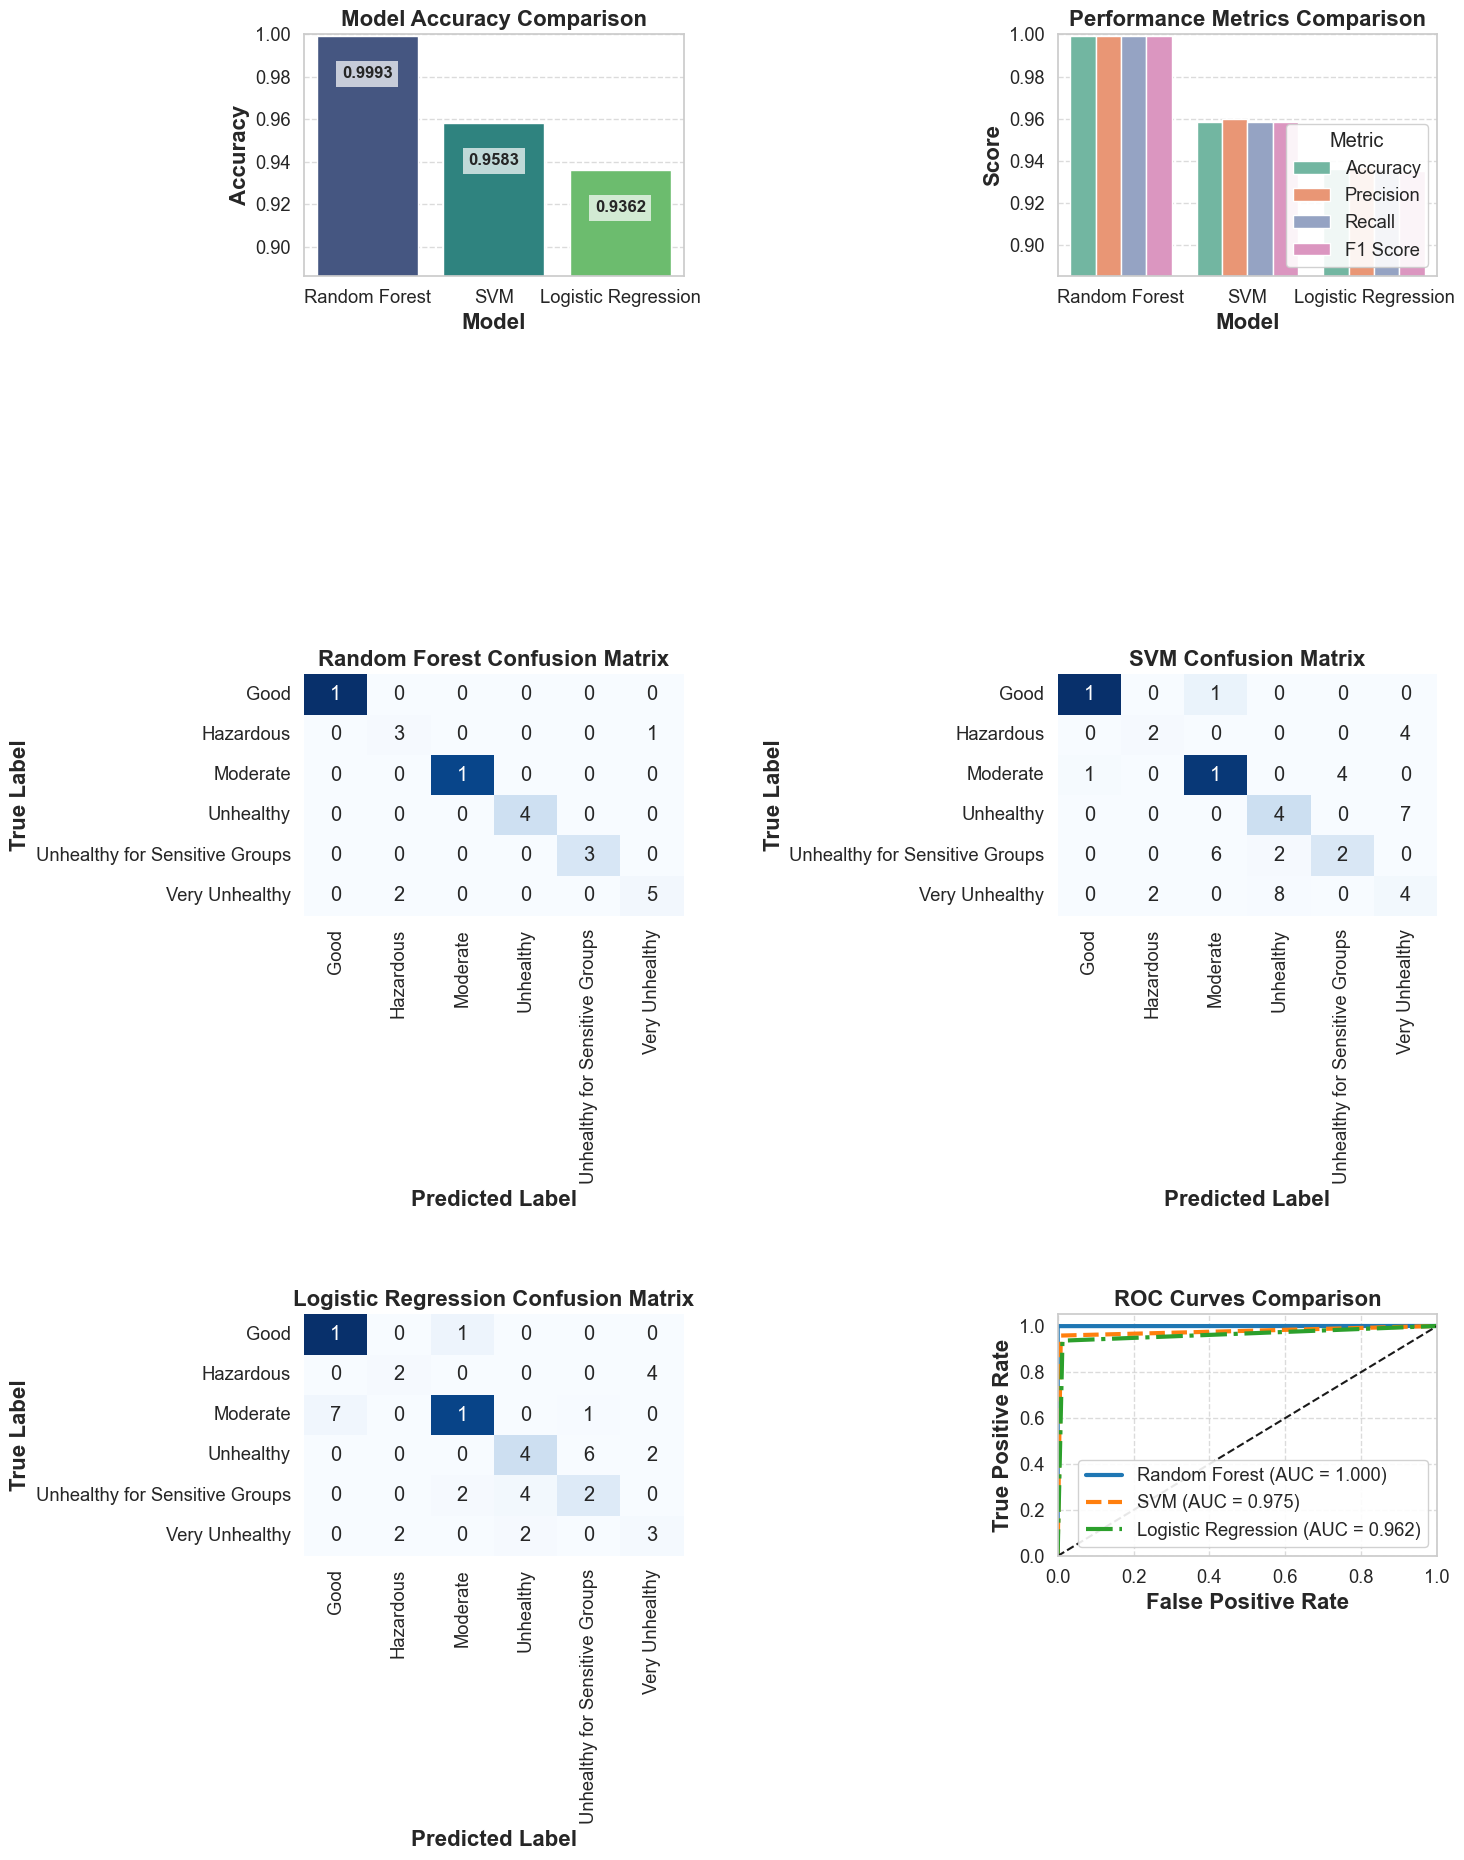

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for each model
models = ['Random Forest', 'SVM', 'Logistic Regression']
predictions = [rf_pred, svm_pred, lr_pred]

# Calculate metrics
accuracy_scores = [accuracy_score(y_test, pred) for pred in predictions]
precision_scores = [precision_score(y_test, pred, average='weighted') for pred in predictions]
recall_scores = [recall_score(y_test, pred, average='weighted') for pred in predictions]
f1_scores = [f1_score(y_test, pred, average='weighted') for pred in predictions]

# Set style parameters
sns.set(style="whitegrid", font_scale=1.2, palette="muted")

# Set figure size for all plots
plt.figure(figsize=(16, 20))

label_fontdict = {'fontsize': 16, 'fontweight': 'bold'}

# 1. Accuracy Comparison Bar Chart
plt.subplot(3, 2, 1)
sns.barplot(x=models, y=accuracy_scores, hue=models, palette='viridis', legend=False)
plt.title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', **label_fontdict)
plt.ylabel('Accuracy', **label_fontdict)
plt.ylim(min(accuracy_scores) - 0.05, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, acc in enumerate(accuracy_scores):
    plt.text(i, acc - 0.02, f'{acc:.4f}', ha='center', fontsize=12, fontweight='bold', 
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# 2. Multiple Metrics Comparison
plt.subplot(3, 2, 2)
metrics_data = {
    'Model': models * 4,
    'Metric': ['Accuracy'] * 3 + ['Precision'] * 3 + ['Recall'] * 3 + ['F1 Score'] * 3,
    'Value': accuracy_scores + precision_scores + recall_scores + f1_scores
}

metrics_df = pd.DataFrame(metrics_data)
ax = sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_df, palette='Set2')
plt.title('Performance Metrics Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', **label_fontdict)
plt.ylabel('Score', **label_fontdict)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric', loc='lower right', frameon=True, framealpha=0.9)
plt.ylim(min(min(accuracy_scores), min(precision_scores), min(recall_scores), min(f1_scores)) - 0.05, 1.0)

# 3. Confusion Matrices
class_names = label_encoder.classes_
for i, (model_name, pred) in enumerate(zip(models, predictions)):
    plt.subplot(3, 2, i+3)
    cm = confusion_matrix(y_test, pred)
    
    # Calculate percentages for annotations
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum * 100
    annot = np.empty_like(cm, dtype=str)
    for j in range(cm.shape[0]):
        for k in range(cm.shape[1]):
            annot[j,k] = f'{cm[j,k]}\n{cm_perc[j,k]:.1f}%'
    
    sns.heatmap(
        cm, 
        annot=annot, 
        fmt='', 
        cmap='Blues',
        xticklabels=class_names,
        yticklabels=class_names,
        cbar=False
    )
    plt.title(f'{model_name} Confusion Matrix', fontsize=16, fontweight='bold')
    plt.xlabel('Predicted Label', **label_fontdict)
    plt.ylabel('True Label', **label_fontdict)

# 4. Combined ROC curve (for multi-class, we'll use one-vs-rest approach)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle

plt.subplot(3, 2, 6)
classes = np.unique(y)
n_classes = len(classes)

# Binarize the labels for ROC curve
y_test_bin = label_binarize(y_test, classes=classes)

# Line colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # More distinct colors
linestyles = ['-', '--', '-.']

for model_name, y_pred, color, linestyle in zip(models, predictions, colors, linestyles):
    y_score = label_binarize(y_pred, classes=classes)
    
    # Compute micro-average ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, 
             label=f'{model_name} (AUC = {roc_auc:.3f})',
             color=color, linestyle=linestyle, linewidth=3)

plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', **label_fontdict)
plt.ylabel('True Positive Rate', **label_fontdict)
plt.title('ROC Curves Comparison', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", frameon=True, framealpha=0.9)
plt.grid(linestyle='--', alpha=0.7)

plt.tight_layout(pad=4.0)

plt.show()